<a href="https://colab.research.google.com/github/ViniciusRosa1/yolov11_tutorial/blob/main/treinar_modelo_deteccao_objetos_com_yolov11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Como Treinar a Detecção de Objetos com YOLOv11 em um Conjunto de Dados Personalizado
---
## **Dica**: Use o Acelerador GPU do google colab

Vá para `Editar` -> `Configurações do notebook`-> `Acelerador de hardware`, defina como `T4-GPU` e clique em Salvar. Isso garantirá que seu notebook use uma GPU, o que acelerará significativamente o tempo de treinamento do modelo.

### Passos do tutorial
---
- Antes de Começar
- Instale o YOLOv11 via Ultralytics
- Inferencia com um modelo Pré-Treinado COCO dataset
- Universo Roboflow
- Preparando o dataset
- Treinamento
- Validação do treinamento
- Inferência com o modelo treinado

***Vamos começar!***


#### Antes de começar

- Siga a **DICA**

In [1]:
!nvidia-smi

Thu May 29 01:31:01 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   50C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


### ***Instale o YOLOv11***

In [3]:
!pip install "ultralytics<=8.3.40" -q supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.3/112.6 GB disk)


### ***Inferência com o modelo Pré-Treinado COCO dataset***

## CLI

In [4]:
!yolo task=detect mode=predict model=yolo11n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True


Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 2 persons, 1 car, 1 dog, 1 handbag, 49.7ms
Speed: 2.8ms preprocess, 49.7ms inference, 195.7ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


##### **NOTA:**: O resultado da imagem anotada foi salvo em {HOME}/runs/detect/predict/. Vamos motra-la!

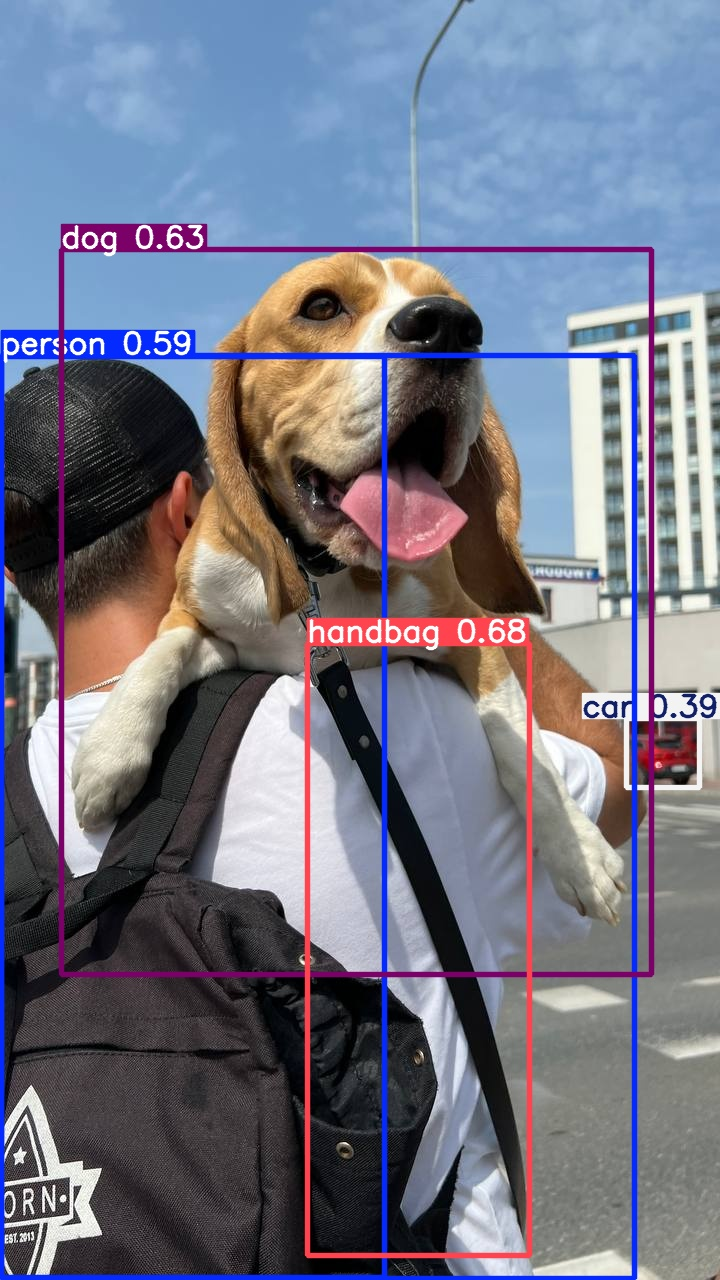

In [5]:
from IPython.display import Image as IPyImage


IPyImage(filename=f'/content/runs/detect/predict/dog.jpg', width=600)

# Universo Roboflow

##### Neste tutorial, vamos utilizar um conjunto de dados pronto, encontrado na plataforma [Roboflow](https://roboflow.com/), ela facilita o processo de encontrar, preparar e exportar datasets para diferentes frameworks de treinamento, como o YOLOv11.

##### Durante o vídeo, mostro passo a passo como utilizar um dataset público na plataforma – no nosso caso, um dataset voltado para detecção de placas de carros. Também explico como importar esse dataset diretamente para o Google Colab e iniciar o treinamento de um modelo YOLOv11 de forma simples e acessível.

<blockquote class="imgur-embed-pub" lang="en" data-id="crfGBMI"><a href="https://imgur.com/crfGBMI">Ver vídeo no imgur</a></blockquote><script async src="//s.imgur.com/min/embed.js" charset="utf-8"></script>


#Carregando o Dataset



Dataset escolhido : https://universe.roboflow.com/roboflow-universe-projects/license-plate-recognition-rxg4e/dataset/11


##### **NOTA**: Ao treinar o YOLOv11, certifique-se de que seus dados estejam localizados na pasta datasets. Neste tutorial, usaremos um dos conjuntos de dados disponíveis no Roboflow Universe. Ao fazer o download, certifique-se de selecionar o formato de exportação yolov11.


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="l********") # Sua API-Roboflow aqui
project = rf.workspace("roboflow-universe-projects").project("license-plate-recognition-rxg4e")
version = project.version(11)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


## Treinando o modelo

#### Explicação de cada item:

* **`yolo`**: É o comando principal da interface da linha de comando da biblioteca Ultralytics YOLO.

* **`task`**: Define a tarefa como **detecção de objetos**. Outras opções possíveis incluem `segment` (segmentação) e `classify` (classificação), mas aqui o foco é detectar objetos com caixas delimitadoras.

* **`mode`**: Coloca o modelo em **modo de treinamento**, ou seja, vai treinar a rede com os dados fornecidos.

* **`model`**: Especifica o **modelo base** a ser usado (pré-treinado). Nesse caso, um modelo pequeno e leve chamado `yolo11s.pt`. Pode ser substituído por outros como `yolov8n.pt`, `yolov5s.pt`, etc., dependendo da versão e arquitetura desejada.

* **`data`**: Fornece o **caminho para o arquivo de configuração do dataset**, geralmente contendo caminhos para imagens, número de classes e nomes das classes.

* **`epochs`**: Define o número de **épocas de treinamento**. Aqui, o modelo será treinado por 5 passagens completas pelos dados.

* **`imgsz`**: Define o **tamanho das imagens** (em pixels) usadas no treinamento. Aqui, as imagens serão redimensionadas para 640x640.

* **`plots`**: Gera **gráficos de desempenho**, como perda (loss), precisão e mAP ao longo das épocas, para ajudar na visualização dos resultados.

In [7]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=5 imgsz=640 plots=True

/content
New https://pypi.org/project/ultralytics/8.3.146 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/License-Plate-Recognition-11/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed

##### **NOTA:** O resultado do treinamento completo foi salvo em {HOME}/runs/detect/train/. Vamos examiná-lo!

In [8]:
!ls {HOME}/runs/detect/train/

args.yaml					    results.png
confusion_matrix_normalized.png			    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1748480826.b77582969208.7423.0  train_batch2.jpg
F1_curve.png					    val_batch0_labels.jpg
labels_correlogram.jpg				    val_batch0_pred.jpg
labels.jpg					    val_batch1_labels.jpg
P_curve.png					    val_batch1_pred.jpg
PR_curve.png					    val_batch2_labels.jpg
R_curve.png					    val_batch2_pred.jpg
results.csv					    weights


/content


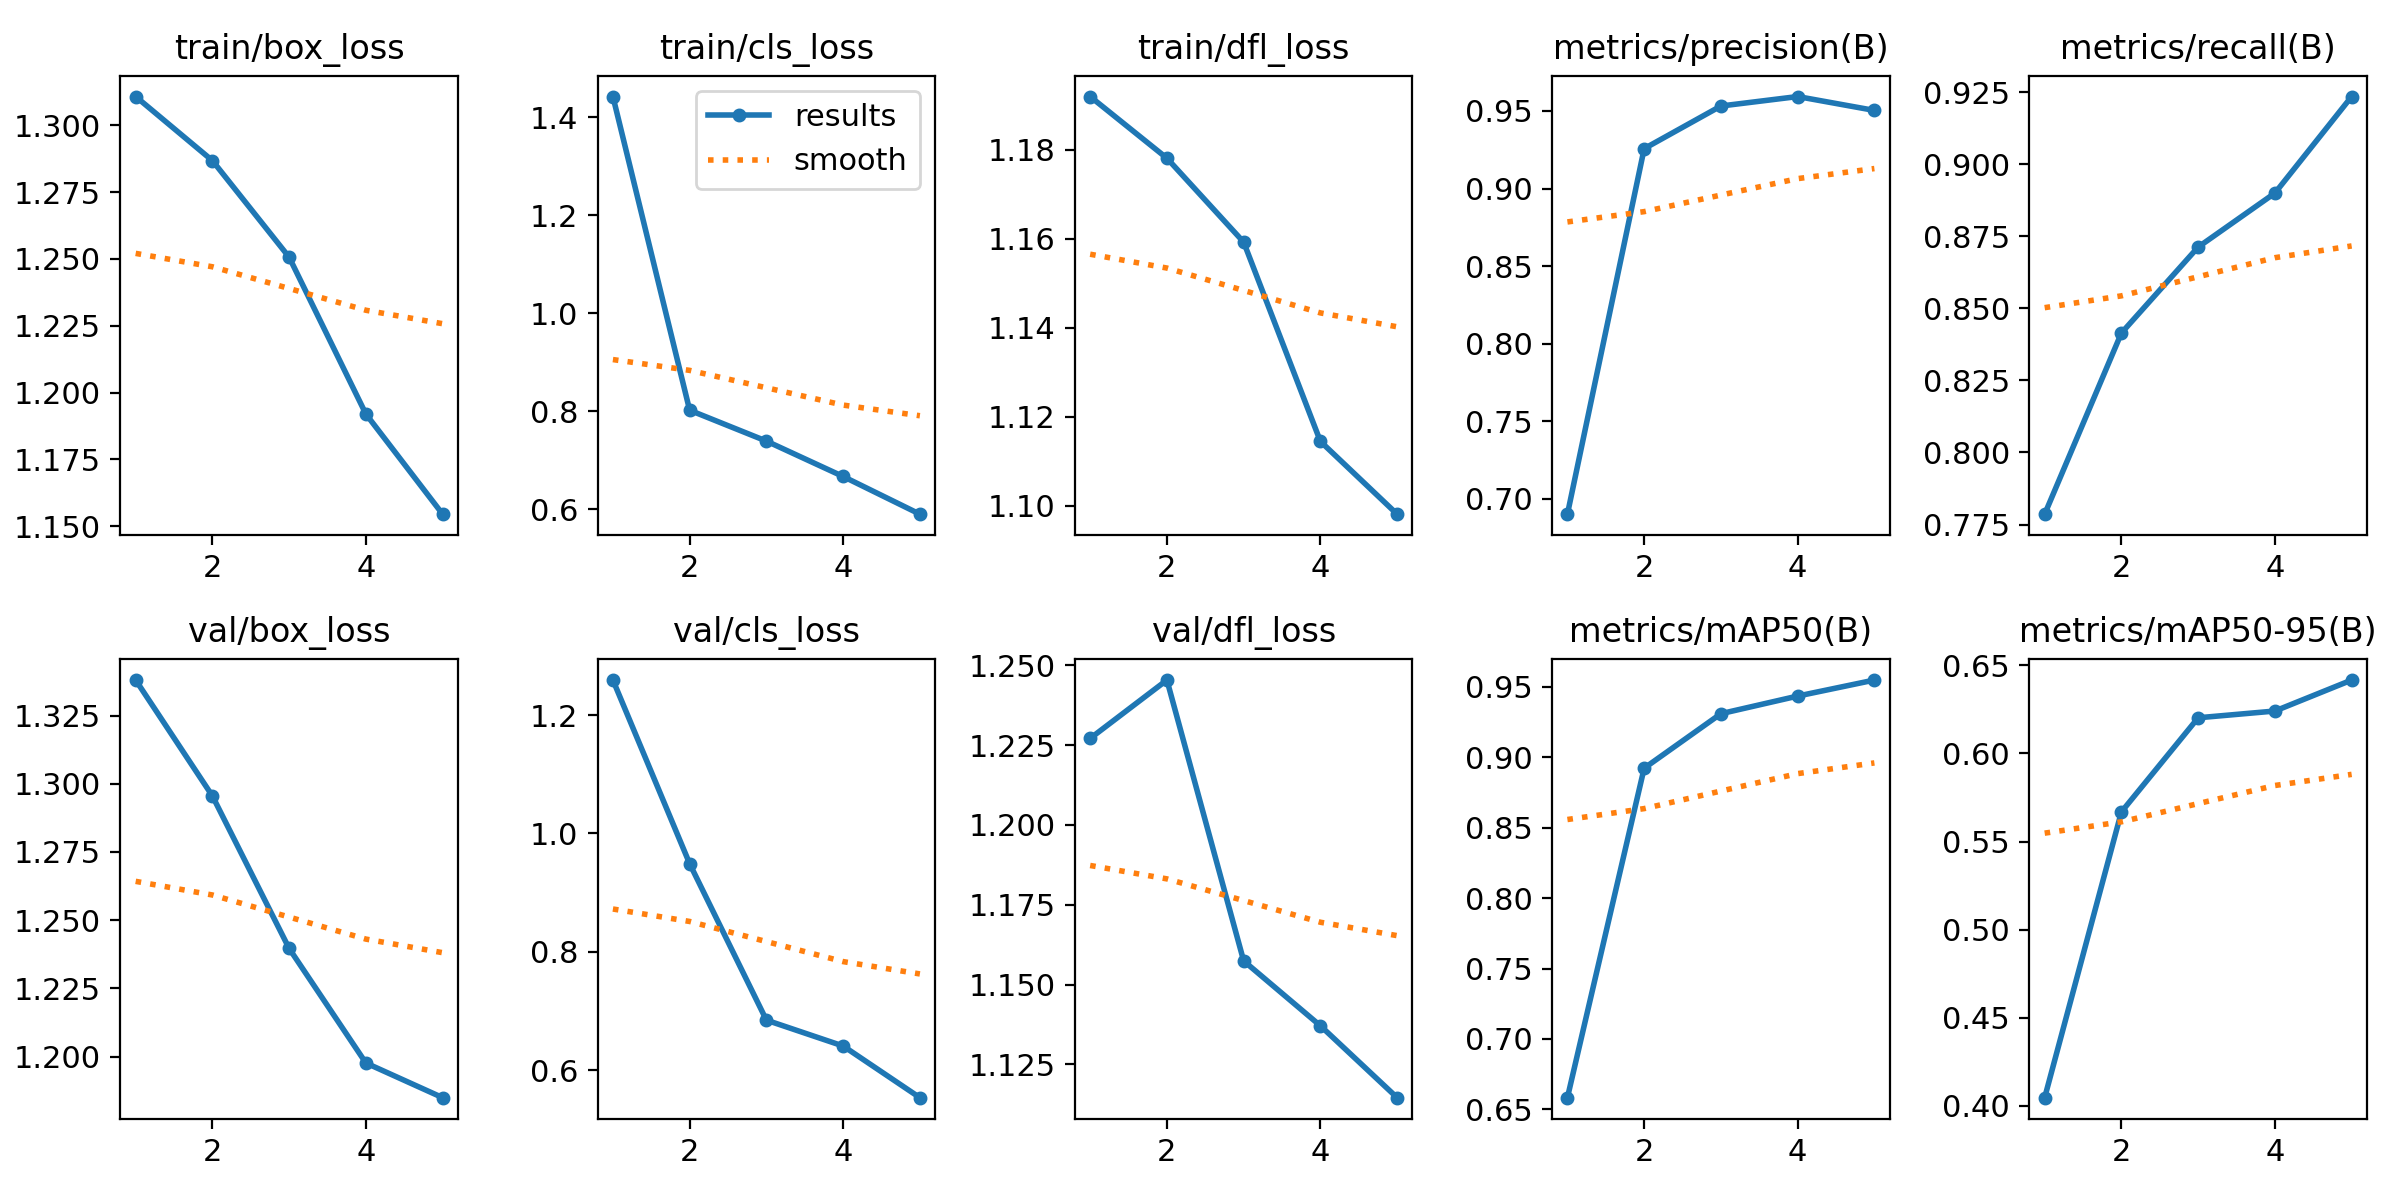

In [9]:
%cd {HOME}

from IPython.display import display, Image
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


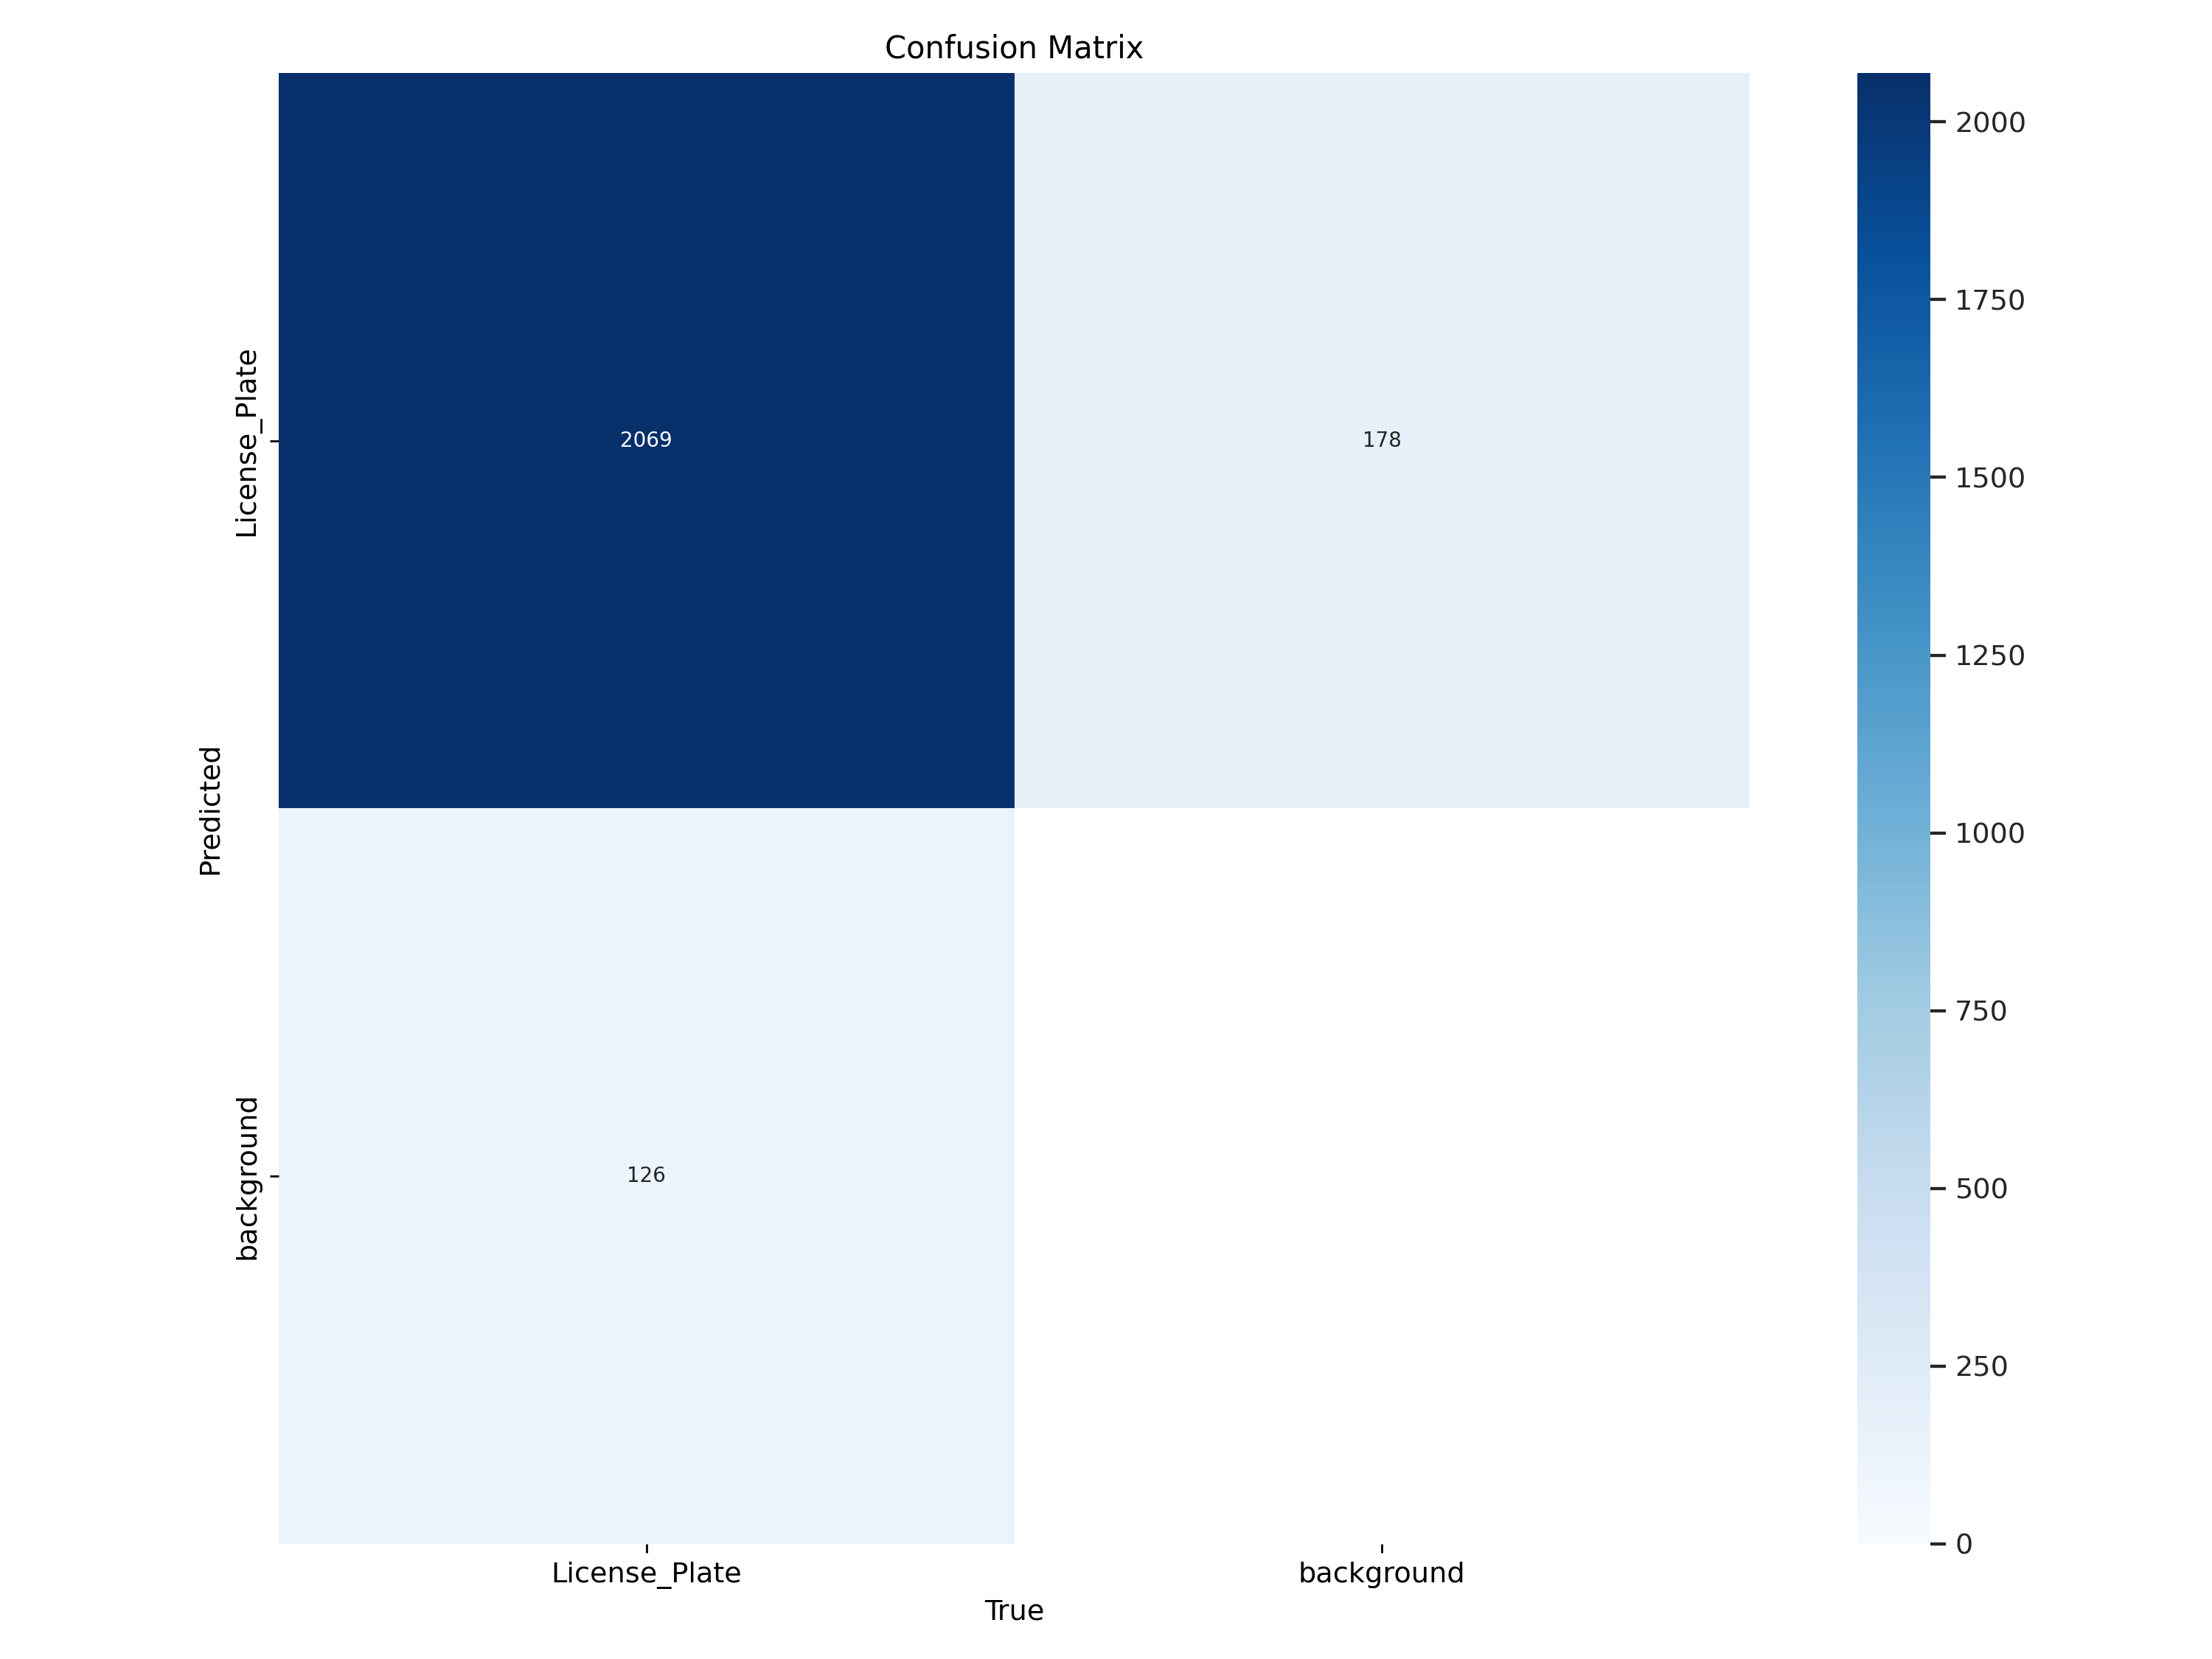

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

## Validar modelo


In [11]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml


/content
Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/License-Plate-Recognition-11/valid/labels.cache... 2048 images, 3 backgrounds, 0 corrupt: 100% 2048/2048 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 128/128 [00:22<00:00,  5.68it/s]
                   all       2048       2195       0.95      0.924      0.955      0.643
Speed: 0.2ms preprocess, 6.2ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inferência com o modelo


In [12]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True


/content
Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/1020 /content/License-Plate-Recognition-11/test/images/0002a5b67e5f0909_jpg.rf.c8f81ef986e3e99af6f349c200080453.jpg: 480x640 2 License_Plates, 49.6ms
image 2/1020 /content/License-Plate-Recognition-11/test/images/000812dcf304a8e7_jpg.rf.ba32e6c184b3d974abcced6f7c29af6d.jpg: 576x640 2 License_Plates, 46.4ms
image 3/1020 /content/License-Plate-Recognition-11/test/images/0010f4c10f7ab07e_jpg.rf.1844f6dde3b97ed1c762db933bbacaf3.jpg: 480x640 3 License_Plates, 12.9ms
image 4/1020 /content/License-Plate-Recognition-11/test/images/001cdd25e148cd36_jpg.rf.3921d4ff1d51af107666bc7ef7bd45b1.jpg: 480x640 1 License_Plate, 12.1ms
image 5/1020 /content/License-Plate-Recognition-11/test/images/002519f868563098_jpg.rf.29775b804909c1d042ce008c09f033e4.jpg: 448x640 1 License_Plate, 44.6ms
image 6/1020 /content/License-Plate-

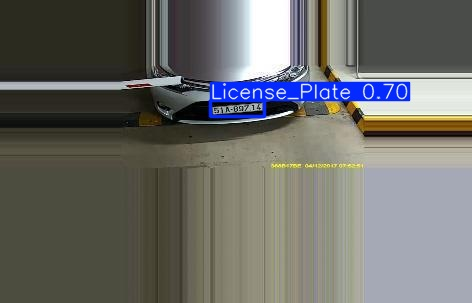

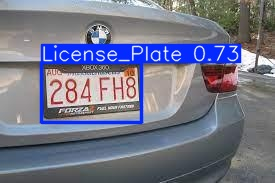

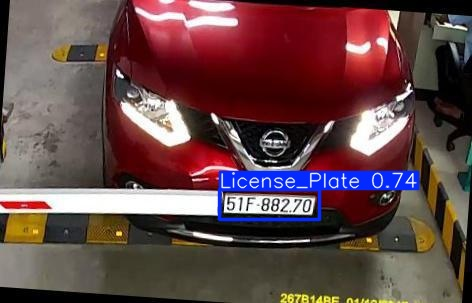

In [13]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

##Realizando inferências nas imagens coletadas da internet

In [14]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={HOME}/testes save=True

/content
Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/5 /content/testes/teste1.png: 352x640 (no detections), 51.4ms
image 2/5 /content/testes/teste2.png: 480x640 1 License_Plate, 47.0ms
image 3/5 /content/testes/teste3.png: 352x640 1 License_Plate, 11.3ms
image 4/5 /content/testes/teste4.png: 448x640 1 License_Plate, 44.2ms
image 5/5 /content/testes/teste5.png: 480x640 1 License_Plate, 12.8ms
Speed: 2.7ms preprocess, 33.3ms inference, 32.4ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict6
💡 Learn more at https://docs.ultralytics.com/modes/predict


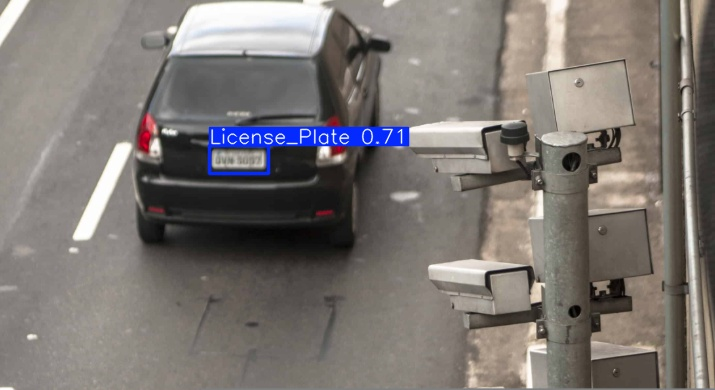

In [17]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/teste3.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")